In [1]:
import pandas as pd
discfile='C:\\Users\\HongYuChai\\Desktop\\datachy\\nsw2.csv'
data=pd.read_csv(discfile,index_col=0)
data


,TOTALDEMAND
2015-01-01 00:30:00,6920.94
2015-01-01 01:00:00,6668.71
2015-01-01 01:30:00,6327.71
2015-01-01 02:00:00,6056.02
2015-01-01 02:30:00,5827.97
2015-01-01 03:00:00,5711.33
2015-01-01 03:30:00,5653.85
2015-01-01 04:00:00,5625.27
2015-01-01 04:30:00,5618.95
2015-01-01 05:00:00,5580.51


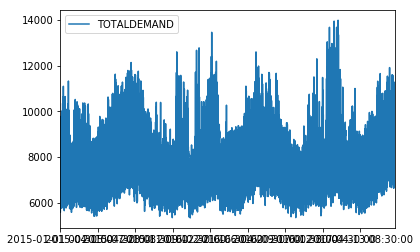

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
data.plot()
plt.show()

C:\Users\HongYuChai\Anaconda2\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


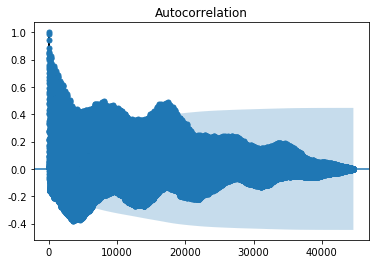

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'TOTALDEMAND']))[1]

(-13.915072779958873, 5.4222145261131407e-26, 56L, 44583L, {'5%': -2.8616048317741982, '1%': -3.4304966854305716, '10%': -2.5668045078394472}, 546711.0986143843)


In [5]:
#D_data = data.diff().dropna()
#D_data.columns = [u'TOTALDEMAND']

In [6]:
#D_data.plot()
#plt.show()

In [7]:
#plot_acf(D_data).show()
#plt.show()

In [8]:
#from statsmodels.graphics.tsaplots import plot_pacf
#偏自相关图
#plot_pacf(data).show()
#plt.show()

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'白噪声检验结果为：', acorr_ljungbox(data, lags=1))

(u'\u767d\u566a\u58f0\u68c0\u9a8c\u7ed3\u679c\u4e3a\uff1a', (array([ 43241.27463548]), array([ 0.])))


In [15]:
from statsmodels.tsa.arima_model import ARIMA
#定阶
#一般阶数不超过length/10
pmax =10
#一般阶数不超过length/10
qmax =10

bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
        try:
            tmp.append(ARIMA(data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
#从中可以找出最小值
bic_matrix = pd.DataFrame(bic_matrix)
#先用stack展平，然后用idxmin找出最小值位置。
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值为：%s、%s' %(p,q))

ValueError: attempt to get argmin of an empty sequence

In [16]:
#建立ARIMA(0, 1, 1)模型
model = ARIMA(data, (0,1,1)).fit()
#给出一份模型报告
model.summary2()
#作为期5天的预测，返回预测结果、标准误差、置信区间。
model.forecast(5)

ValueError: Given a pandas object and the index does not contain dates

In [17]:
data

,TOTALDEMAND
2015-01-01 00:30:00,6920.94
2015-01-01 01:00:00,6668.71
2015-01-01 01:30:00,6327.71
2015-01-01 02:00:00,6056.02
2015-01-01 02:30:00,5827.97
2015-01-01 03:00:00,5711.33
2015-01-01 03:30:00,5653.85
2015-01-01 04:00:00,5625.27
2015-01-01 04:30:00,5618.95
2015-01-01 05:00:00,5580.51


In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas import Series,DataFrame
from datetime import datetime
from dateutil.parser import parse
import time
from pandas.tseries.offsets import Hour,Minute
from __future__ import print_function
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
arma_mod01 = sm.tsa.ARMA(data,(0,1)).fit()

ValueError: Given a pandas object and the index does not contain dates